In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [48]:
df = pd.read_csv("C:/Users/Kalea/Desktop/week_1/Data/raw_analyst_ratings.csv",index_col=False)


In [52]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [51]:
df.info()

# Or drop by column index 
df = df.drop(df.columns[0], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [53]:
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [54]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Descriptive Stats

In [55]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### Publisher Counts

In [56]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


 ### Duplicate Check and removal

In [57]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


### Date Analysis

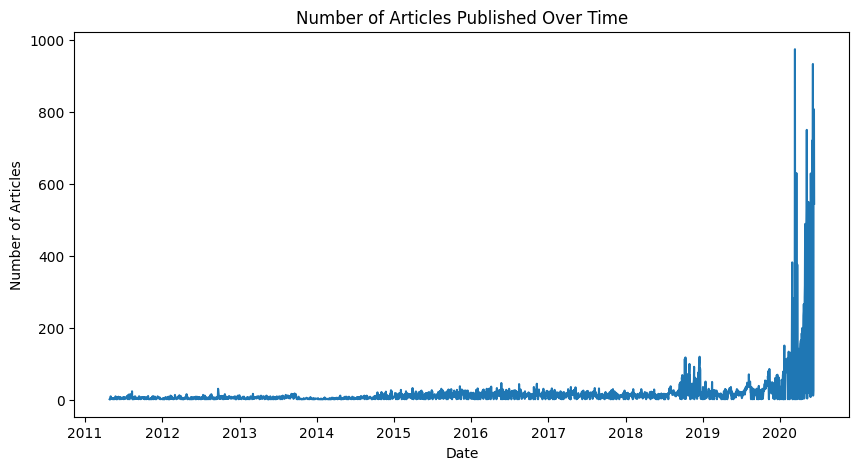

In [58]:
df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

###  Word Cloud

In [26]:
text = ' '.join(df['headline'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

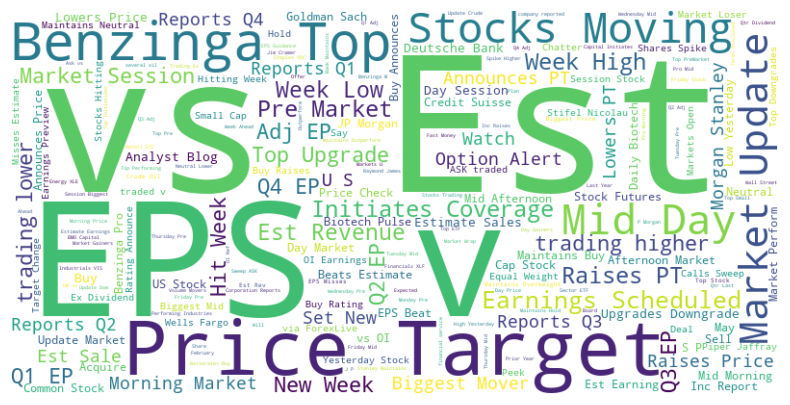

In [59]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Perform Sentiment Analysis on News Headlines

In [65]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kalea\AppData\Roaming\nltk_data...


True

In [66]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

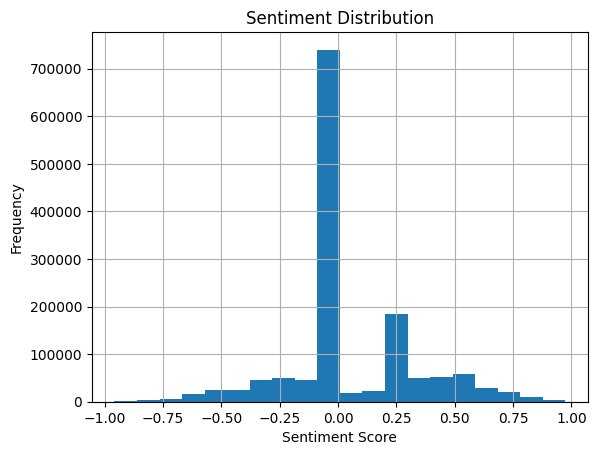

In [67]:
### Sentiment Distribution visualization
df['sentiment'].hist(bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Time Series Analysis

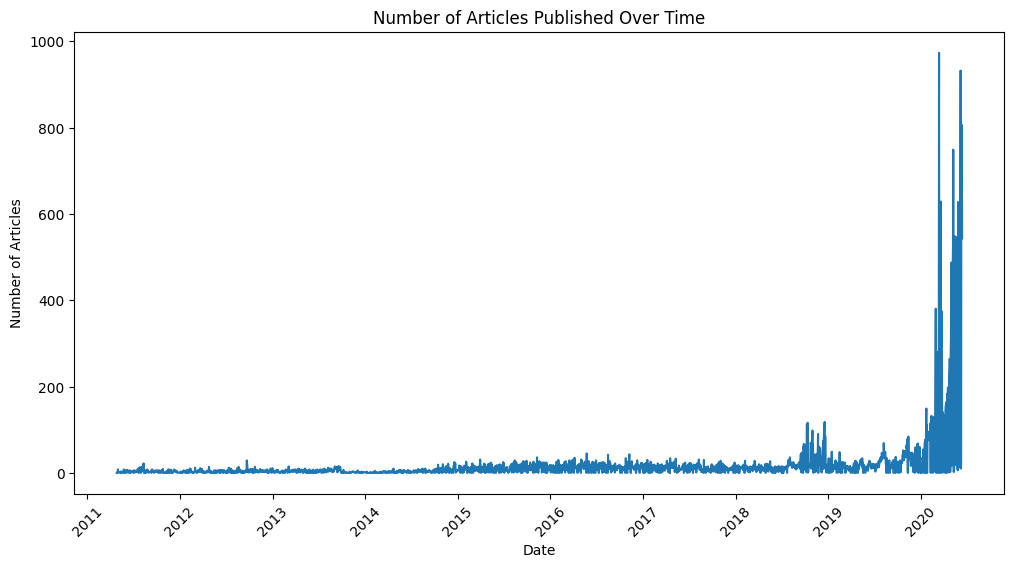

In [69]:
articles_per_day = df['date'].dt.date.value_counts().sort_index()

# Plot the time series of article publications
plt.figure(figsize=(12, 6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

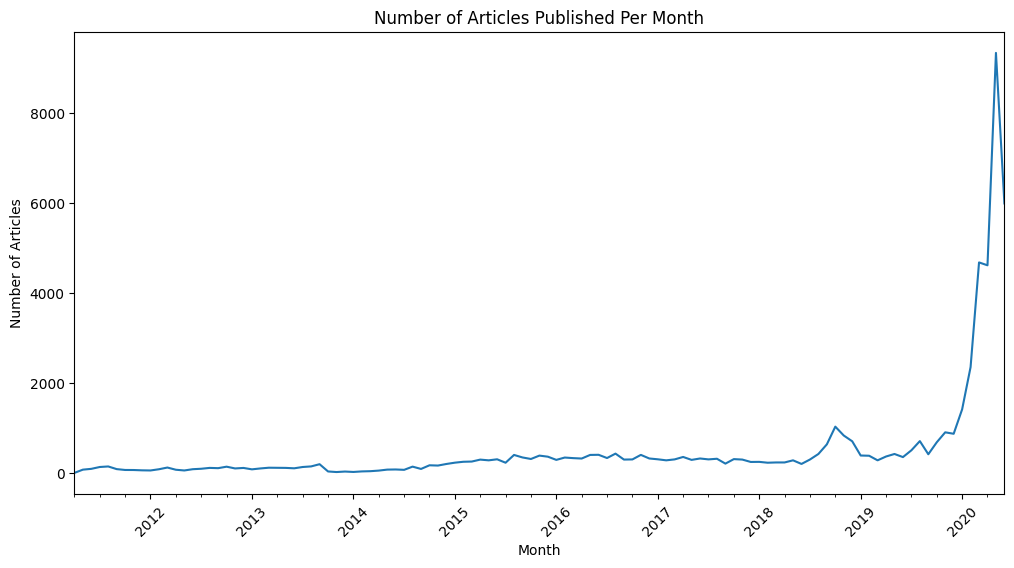

In [72]:
# Group by month and count publications
df['date'] = df['date'].dt.tz_localize(None)

articles_per_month = df['date'].dt.to_period('M').value_counts().sort_index()

# Plot the monthly publication frequency
plt.figure(figsize=(12, 6))
articles_per_month.plot(kind='line')
plt.title('Number of Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


#### Time of Day Analysis: When Are Articles Published?

In [74]:
df['hour'] = df['date'].dt.hour

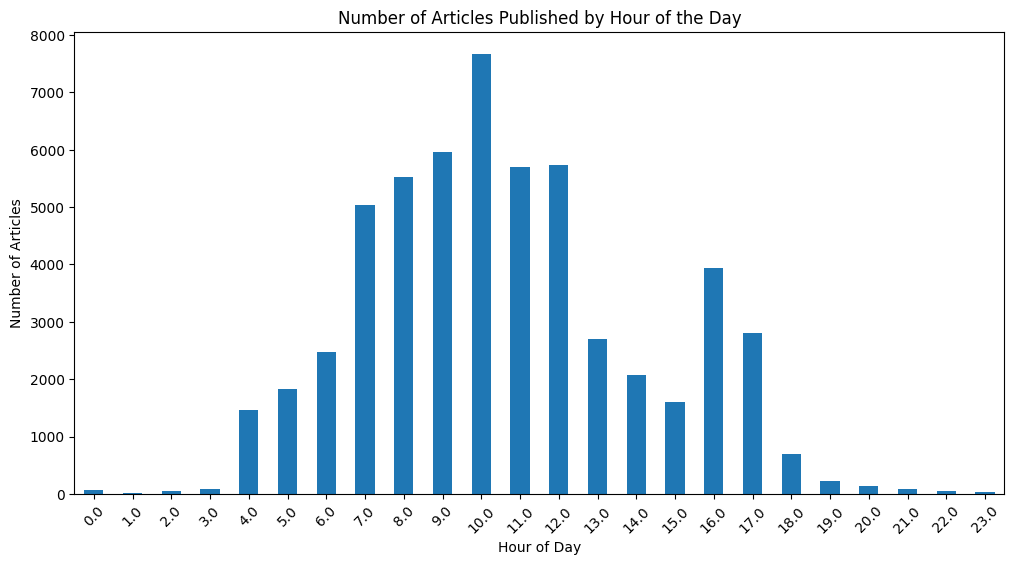

In [75]:
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Published by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(24), rotation=45)
plt.show()

### Publisher Analysis

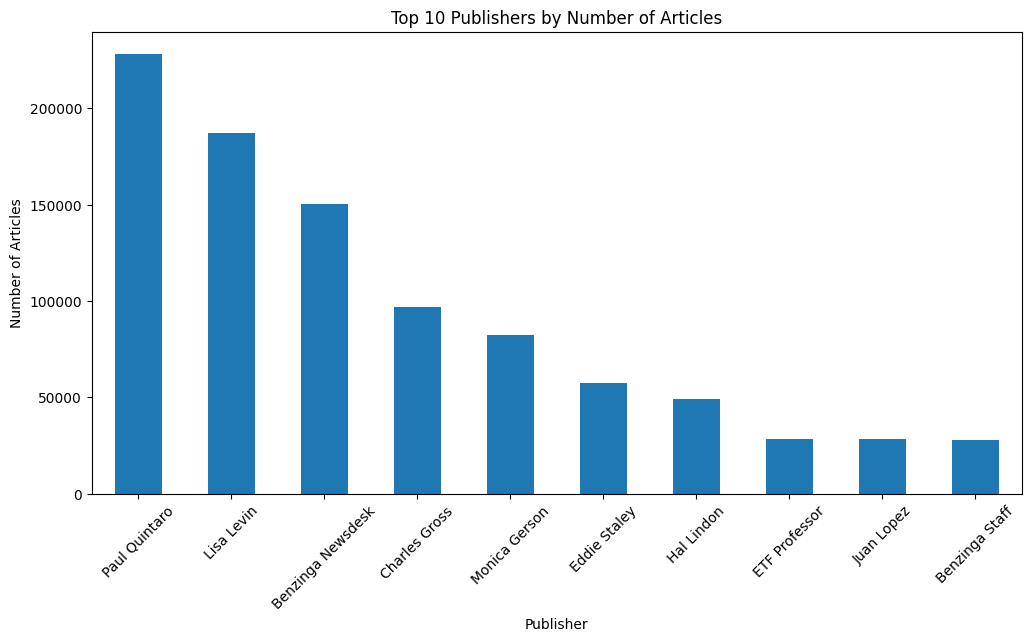

In [76]:
publisher_counts = df['publisher'].value_counts()

# Plot the number of articles published by each publisher
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### What Type of News Do Publishers Report?
#### Sentiment by Publisher

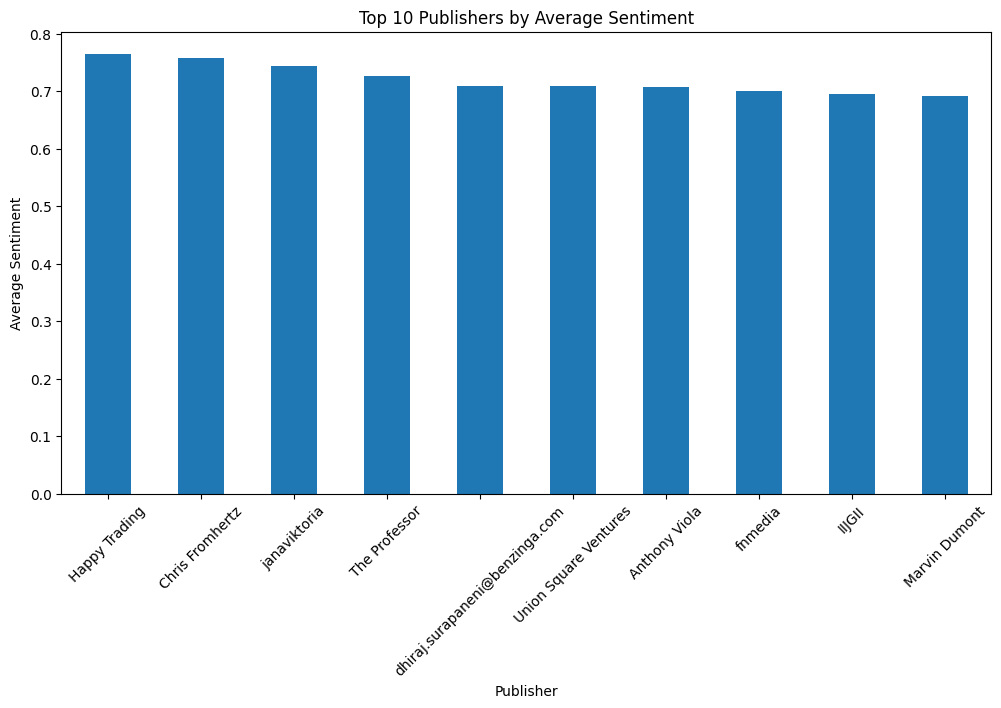

In [77]:
publisher_sentiment = df.groupby('publisher')['sentiment'].mean()

# Plot the average sentiment for each publisher
plt.figure(figsize=(12, 6))
publisher_sentiment.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Average Sentiment')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()


#### Identifying Email Domains in Publisher Names

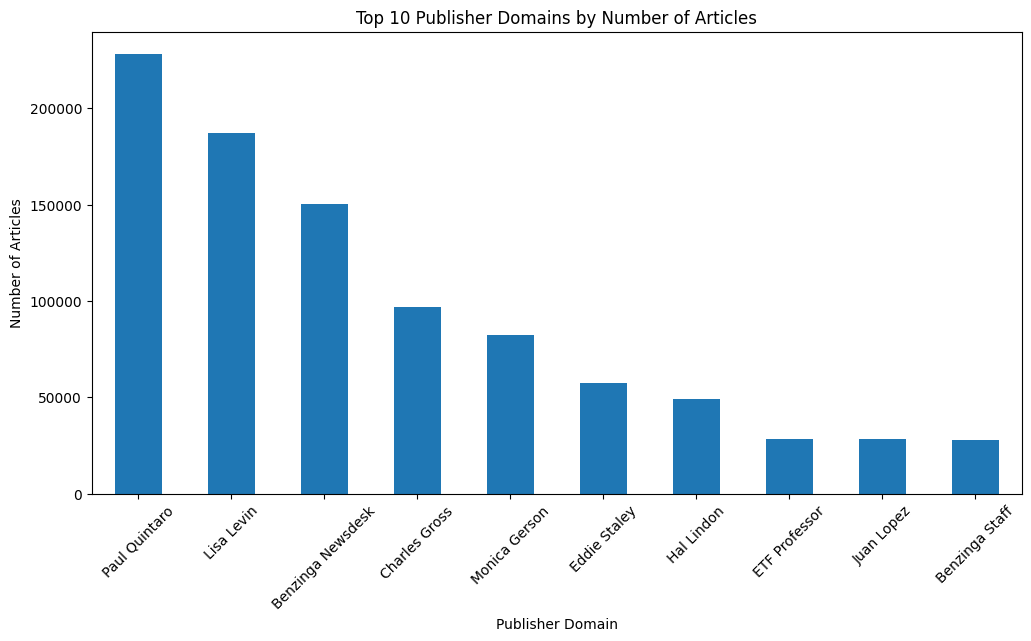

In [78]:
# Extract the domain from email addresses in the 'publisher' column
df['publisher_domain'] = df['publisher'].str.split('@').str[-1]

# Count the number of articles by publisher domain
publisher_domains = df['publisher_domain'].value_counts()

# Plot the number of articles by publisher domain
plt.figure(figsize=(12, 6))
publisher_domains.head(10).plot(kind='bar')
plt.title('Top 10 Publisher Domains by Number of Articles')
plt.xlabel('Publisher Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
